<a href="https://colab.research.google.com/github/RoshanKumar854/ML-Projects/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the datasets

In [41]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

#Droping irrelevant variables
##We have some features which mostly have missing values(60%+). So, it's better to drop them due to lack of whole data.

In [42]:
train_data = train_data.drop(["Alley","PoolQC", "Fence", "MiscFeature"], axis=1)

#Defining Independent and Dependent variables

In [43]:
y = train_data["SalePrice"]
X = train_data.iloc[:, :-1]

#Dealing with Categorial Features/Columns

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
X = X.apply(LabelEncoder().fit_transform)

#Dropping variables with high correlation.(VIF>10 means variable is correlated with other variables)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif


,VIF,variable
0,4.241049,Id
1,11.767918,MSSubClass
2,31.157036,MSZoning
3,5.570519,LotFrontage
4,8.115459,LotArea
...,...,...
71,1.148829,MiscVal
72,5.261800,MoSold
73,3.133686,YrSold
74,27.889004,SaleType


In [47]:
X.drop(["MSZoning", "Street", "LandContour", "Condition2", "OverallQual", 
        "OverallCond", "YearBuilt", "Exterior1st", "Exterior2nd",
        "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtFinType2",
        "BsmtUnfSF", "TotalBsmtSF", "Heating", "CentralAir", "1stFlrSF",
        "GrLivArea", "FullBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual",
        "TotRmsAbvGrd", "Functional", "FireplaceQu", "GarageYrBlt", "GarageCars",
        "GarageQual", "GarageCond", "PavedDrive", "SaleType"], axis=1)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,0,5,36,327,3,0,4,0,5,2,...,0,49,0,0,0,0,0,1,2,4
1,1,0,51,498,3,0,2,0,24,1,...,187,0,0,0,0,0,0,4,1,4
2,2,5,39,702,0,0,4,0,5,2,...,0,30,0,0,0,0,0,8,2,4
3,3,6,31,489,0,0,0,0,6,2,...,0,24,108,0,0,0,0,1,0,0
4,4,5,55,925,0,0,2,0,15,2,...,118,70,0,0,0,0,0,11,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,5,33,267,3,0,4,0,8,2,...,0,28,0,0,0,0,0,7,1,4
1456,1456,0,56,866,3,0,4,0,14,2,...,214,0,0,0,0,0,0,1,4,4
1457,1457,6,37,415,3,0,4,0,6,2,...,0,48,0,0,0,0,17,4,4,4
1458,1458,0,39,505,3,0,4,0,12,2,...,224,0,38,0,0,0,0,3,4,4


#Let's try linear regression first

In [48]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [49]:
lin_reg.score(X, y)

0.8551352771608627

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X, y, cv=5)

In [51]:
print(scores.mean())

0.8258484338904925


In [52]:
y_pred = lin_reg.predict(X)

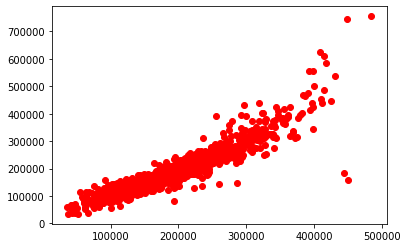

In [53]:
plt.scatter(y_pred, y, color="red")

#Let's put some regularization:)

In [54]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X, y)

Ridge()

In [55]:
ridge_reg.score(X, y)

0.8550914367881538

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge_reg, X, y, cv=5)
print(scores.mean())

0.8261547058920762


In [57]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X, y)

Lasso(alpha=1)

In [58]:
lasso_reg.score(X, y)

0.8551349407785719

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lasso_reg, X, y, cv=5)
print(scores.mean())

#We can say that ridge regression is a better model cause in our validation data ridge performs better compared to lasso and without any regularization

0.8258747312208217


#Let's try decision tree regression

In [60]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(min_samples_split=60)
tree_reg.fit(X, y)
tree_reg.score(X, y)

0.8566004166155717

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X, y, cv=5)
print(scores.mean())

0.7514287538806398


#Let's check with Bagging and Random Forest

In [62]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_reg = BaggingRegressor(
DecisionTreeRegressor(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1)
bag_reg.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=100,
                 n_estimators=500, n_jobs=-1)

In [63]:
scores = cross_val_score(bag_reg, X, y, cv=5)
print(scores.mean())

0.8221309441109232


In [64]:
bag_reg.score(X, y)

#So, we can see that out bagging regressor is 84.34% accurate

0.8419134720835321

In [65]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_reg.fit(X, y)
rnd_reg.score(X, y)

0.8776424410442714

In [66]:
scores = cross_val_score(rnd_reg, X, y, cv=5)
print(scores.mean())

0.8108047771613751


#Let's Try SVM Regression

In [67]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)
svm_reg.score(X, y)

#Again, Not really a good model to go ahead with.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.7389912218549615

##So the best model for our dataset is Linear Regression with Ridge regulation as it gives us the highest validation along with good training score.         So, let's go ahead and implement this model on our test set:)

In [68]:
X_test = pd.read_csv("test.csv")

In [69]:
X_test = X_test.drop(["Alley","PoolQC", "Fence", "MiscFeature"], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_test = X_test.apply(LabelEncoder().fit_transform)
X_test.drop(["MSZoning", "Street", "LandContour", "Condition2", "OverallQual", 
        "OverallCond", "YearBuilt", "Exterior1st", "Exterior2nd",
        "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtFinType2",
        "BsmtUnfSF", "TotalBsmtSF", "Heating", "CentralAir", "1stFlrSF",
        "GrLivArea", "FullBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual",
        "TotRmsAbvGrd", "Functional", "FireplaceQu", "GarageYrBlt", "GarageCars",
        "GarageQual", "GarageCond", "PavedDrive", "SaleType"], axis=1)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,0,0,56,777,3,0,4,0,12,1,...,75,0,0,0,18,0,0,5,4,4
1,1,0,57,964,0,0,0,0,12,2,...,225,24,0,0,0,0,24,5,4,4
2,2,5,50,947,0,0,4,0,8,2,...,134,22,0,0,0,0,0,2,4,4
3,3,5,54,587,0,0,4,0,8,2,...,219,24,0,0,0,0,0,5,4,4
4,4,11,19,118,0,0,4,0,22,2,...,0,68,0,0,27,0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1454,13,0,19,3,0,4,0,10,2,...,0,0,0,0,0,0,0,5,0,4
1455,1455,13,0,17,3,0,4,0,10,2,...,0,12,0,0,0,0,0,3,0,0
1456,1456,0,112,1069,3,0,4,0,11,2,...,245,0,0,0,0,0,0,8,0,0
1457,1457,9,38,647,3,0,4,0,11,2,...,37,20,0,0,0,0,12,6,0,4


In [70]:
y_test_pred = ridge_reg.predict(X_test)
y_test_pred

array([111539.35249667, 158990.53934119, 177674.63957214, ...,
       172486.40888059, 111277.99378107, 251666.30241456])